# Visualize sort procedure

## import modules

In [1]:
import os 
import logging
logging.basicConfig(level=logging.INFO)
import random
import matplotlib.animation as animation
from matplotlib import pyplot as plt

In [2]:
import base64
from IPython.display import HTML
import matplotlib.animation as animation
import os 
GIF_TAG = """<img src="data:image/gif;base64,{0}" alt="some_text">"""

##  prepare HTML tag

In [3]:
def get_giftag(outputfile):
    with open(outputfile, "rb") as imagefile:
        encoded_string = base64.b64encode(imagefile.read())
        tag = GIF_TAG.format(encoded_string.decode("utf-8"))
    return tag

## write your sort algorithm

In [4]:
def get_arg_min(arr):
    m = min(arr)
    for i, a in enumerate(arr):
        if a == m:
            return i, m


def do_selection_sort(arr):
    for i, v in enumerate(arr):
        if i == len(arr) - 1:
            break
        seq = arr[i + 1:]
        arg_min, minimum = get_arg_min(seq)
        if v > minimum:
            j = i + 1 + arg_min
            arr[i], arr[j] = arr[j], arr[i]
        yield arr

## define class of Visualizer

In [5]:
class Visualizer():

    def __init__(self, arr):
        self.fig, self.ax = plt.subplots()
        self.iterator = do_selection_sort(arr)
        self.arr = arr

    def init_func(self):
        self.step = 0

    def update(self, *args):
        self.ax.clear()
        logging.info("i={}".format(self.step))
        try:
            arr = self.iterator.__next__()
        except StopIteration:
            arr = self.arr

        logging.info("arr={}".format(arr))
        self.ax.bar(range(len(arr)), arr)
        self.ax.set_xticks(list(range(max(self.arr) + 1)))
        self.ax.set_yticks(list(range(max(self.arr) + 1)))
        self.ax.set_title("step={}".format(self.step))
        self.step += 1

## Prepare your target data

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
INFO:matplotlib.animation:MovieWriter.run: running command: ['convert', '-size', '432x288', '-depth', '8', '-delay', '100.0', '-loop', '0', 'rgba:-', 'images/output.gif']
INFO:root:i=0
INFO:root:arr=[0, 7, 16, 6, 2, 12, 14, 10, 17, 9, 3, 13, 4, 15, 1, 19, 11, 18, 8, 5]
INFO:root:i=1
INFO:root:arr=[0, 1, 16, 6, 2, 12, 14, 10, 17, 9, 3, 13, 4, 15, 7, 19, 11, 18, 8, 5]
INFO:root:i=2
INFO:root:arr=[0, 1, 2, 6, 16, 12, 14, 10, 17, 9, 3, 13, 4, 15, 7, 19, 11, 18, 8, 5]
INFO:root:i=3
INFO:root:arr=[0, 1, 2, 3, 16, 12, 14, 10, 17, 9, 6, 13, 4, 15, 7, 19, 11, 18, 8, 5]
INFO:root:i=4
INFO:root:arr=[0, 1, 2, 3, 4, 12, 14, 10, 17, 9, 6, 13, 16, 15, 7, 19, 11, 18, 8, 5]
INFO:root:i=5
INFO:root:arr=[0, 1, 2, 3, 4, 5, 14, 10, 17, 9, 6, 13, 16, 15, 7, 19, 11, 18, 8, 12]
INFO:root:i=6
INFO:root:arr=[0, 1, 2, 3, 4, 5, 6, 10, 17, 9, 14, 13, 16, 15, 7, 19, 11, 18, 8, 12]
INFO:root:i=7
INFO:root:arr=[0, 1, 2, 3,


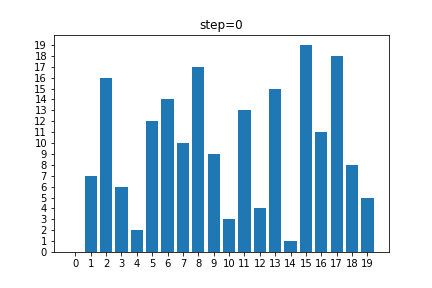

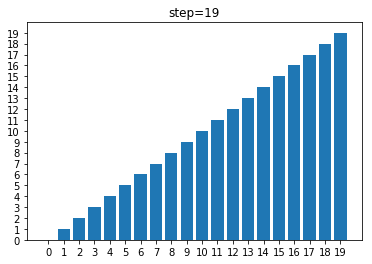

In [6]:
arr = list(range(20))
random.shuffle(arr)

visualizer = Visualizer(arr)


ani = animation.FuncAnimation(
                              visualizer.fig,
                              visualizer.update,
                              init_func=visualizer.init_func,
                              frames=len(arr),
                              interval=1000)

outputfile="images/output.gif"

if not os.path.exists(os.path.dirname(outputfile)):
    os.makedirs(os.path.dirname(outputfile))
    
ani.save(outputfile, writer="imagemagick")

HTML(get_giftag(outputfile))